<a href="https://colab.research.google.com/github/RylleLang/MANTARING_RYLLE_AIRO_CPE311N/blob/main/suplementary_9_1_Data_Visualization_using_Pandas_and_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fb_stock_data = pd.read_csv('fb_stock_prices_2018.csv', parse_dates=['date'], index_col='date')

earthquake_data = pd.read_csv('earthquakes-1.csv')

In [9]:
filepath = 'earthquakes-1.csv'
import pandas as pd
import numpy as np
data = pd.read_csv(filepath)
data

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California
...,...,...,...,...,...,...
9327,0.62,md,1537230228060,"9km ENE of Mammoth Lakes, CA",0,California
9328,1.00,ml,1537230135130,"3km W of Julian, CA",0,California
9329,2.40,md,1537229908180,"35km NNE of Hatillo, Puerto Rico",0,Puerto Rico
9330,1.10,ml,1537229545350,"9km NE of Aguanga, CA",0,California


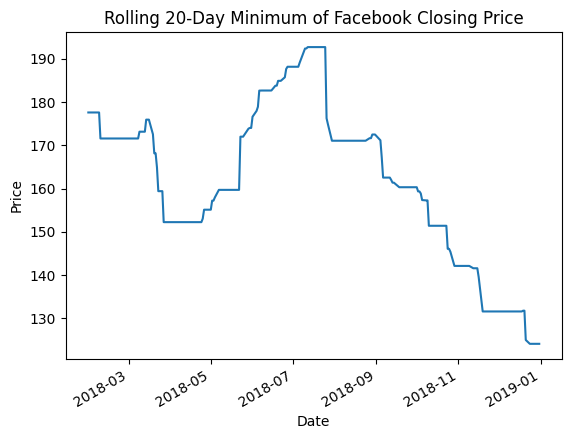

In [ ]:
fb_stock_data['close'].rolling(window=20).min().plot()
plt.title('Rolling 20-Day Minimum of Facebook Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

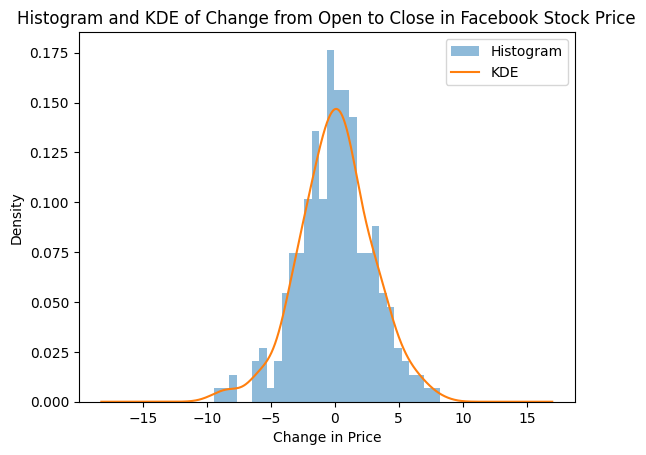

In [ ]:
fb_stock_data['open_close_change'] = fb_stock_data['close'] - fb_stock_data['open']
fb_stock_data['open_close_change'].plot(kind='hist', density=True, alpha=0.5, bins=30)
fb_stock_data['open_close_change'].plot(kind='kde')
plt.title('Histogram and KDE of Change from Open to Close in Facebook Stock Price')
plt.xlabel('Change in Price')
plt.ylabel('Density')
plt.legend(['Histogram', 'KDE'])
plt.show()

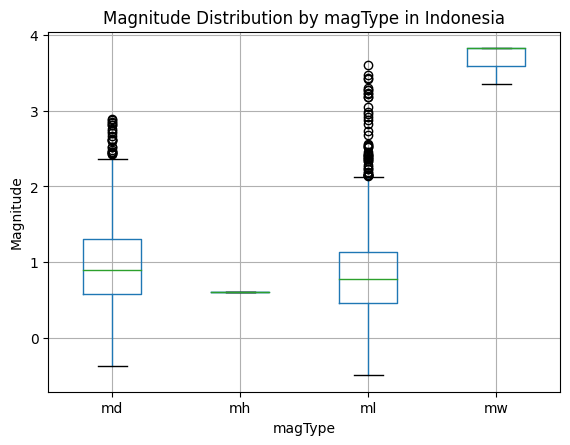

In [10]:
indonesia_earthquakes = earthquake_data[earthquake_data['parsed_place'] == 'California']
indonesia_earthquakes.boxplot(column='mag', by='magType')
plt.title('Magnitude Distribution by magType in Indonesia')
plt.xlabel('magType')
plt.ylabel('Magnitude')
plt.suptitle('')
plt.show()

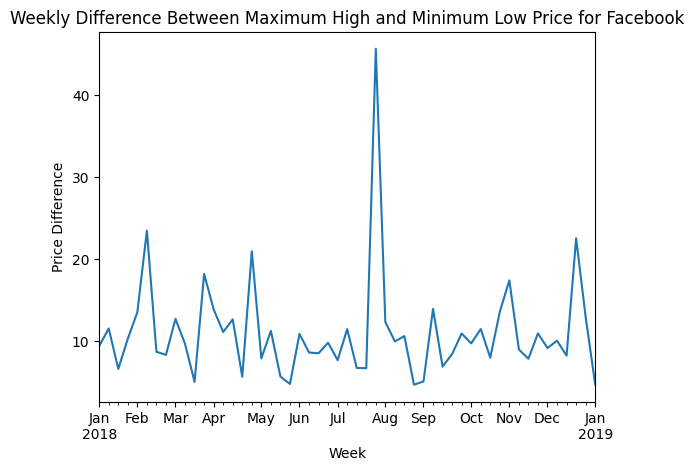

In [ ]:
weekly_price_difference = fb_stock_data.resample('W').agg({'high': 'max', 'low': 'min'})
weekly_price_difference['price_difference'] = weekly_price_difference['high'] - weekly_price_difference['low']
weekly_price_difference['price_difference'].plot()
plt.title('Weekly Difference Between Maximum High and Minimum Low Price for Facebook')
plt.xlabel('Week')
plt.ylabel('Price Difference')
plt.show()

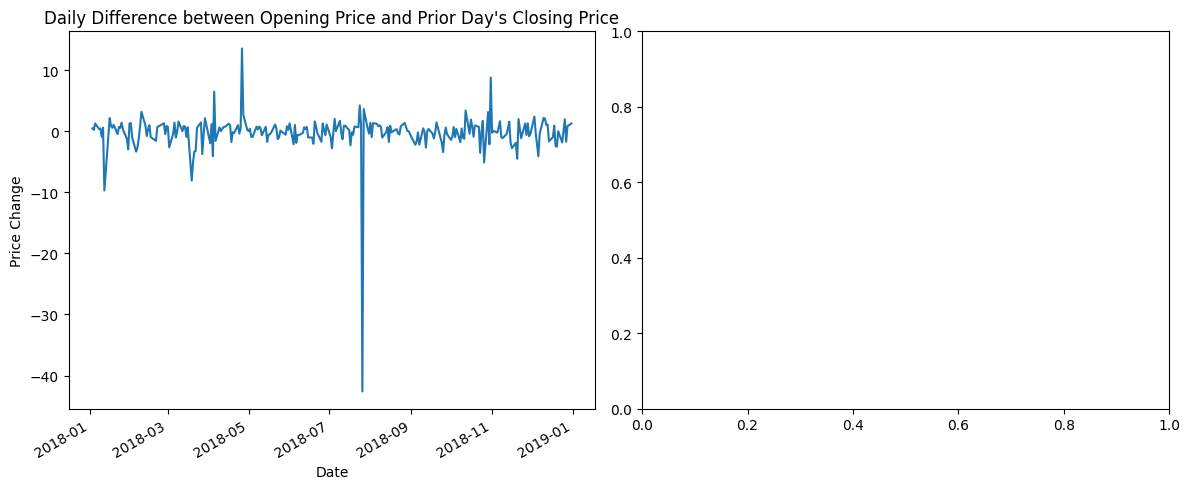

In [14]:
# Calculate daily difference between opening price and prior day's closing price
fb_stock_data['daily_price_change'] = fb_stock_data['open'] - fb_stock_data['close'].shift(1)

# Plot daily price change
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fb_stock_data['daily_price_change'].plot(ax=axes[0])
axes[0].set_title('Daily Difference between Opening Price and Prior Day\'s Closing Price')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price Change')
monthly_net_effect = fb_stock_data.resample('M').sum()
monthly_net_effect['net_effect'] = monthly_net_effect['daily_price_change']

plt.tight_layout()
plt.show()